> ## Natural Language Processing is the technology used to aid computers to understand the human’s natural language.

## Contents

- Introduction to NLP and NLTK

- NLP Pipeline

- Reading raw data

- Cleaning and Pre-processing

- Tokenization

- Vectorization

- Feature Engineering

- Training ML Algorithm for Classifying Spam and non-spam messages

## What is Natural Language Processing?
Natural Language Processing, usually shortened as NLP, is a branch of artificial intelligence that concerned with the ability of a computer to understand, analyze, manipulate and potentially generate human language.

Natural Language Processing or NLP is a very popular field and has lots of applications in our daily life. From typing a message to auto-classification of mails as Spam or not-spam NLP is everywhere.

## Areas of NLP
- Sentiment Analysis
- Topic Modeling
- Text Classification
- parts-of-speech Tagging / Sentence Segmentation

Core component of NLP is extracting all the information
from a block of text that is relevant to computer
understanding the language [task-specific]

### NLP Pipeline for Text Data
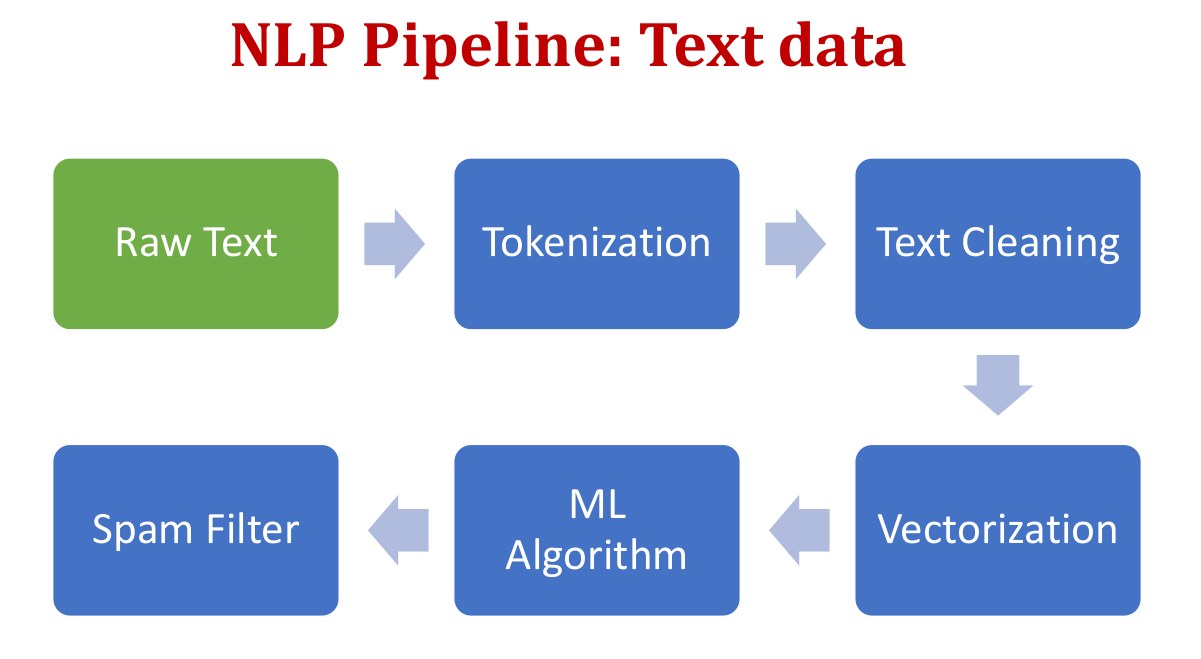

## Reading and Cleaning Data

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import nltk
# nltk.download()
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

###  Reading Text data

**Method 1: open()**

In [2]:
raw_data = open('Data_set/spam.csv',encoding='ISO-8859-1').read()
raw_data[0:500]


'v1,v2,,,\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\nham,Ok lar... Joking wif u oni...,,,\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\nham,U dun say so early hor... U c already then say...,,,\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\nspam,"FreeMsg Hey there darling it\'s been'

In [3]:
parsed_data = raw_data.replace('\t','\n').split('\n')
parsed_data[0:10]

['v1,v2,,,',
 'ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,',
 'ham,Ok lar... Joking wif u oni...,,,',
 "spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,",
 'ham,U dun say so early hor... U c already then say...,,,',
 'ham,"Nah I don\'t think he goes to usf, he lives around here though",,,',
 'spam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,',
 'ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,',
 "ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,",
 'spam,WINNER!! As a valued network customer you have been selected to receivea å£900 pri

In [4]:
label_list = parsed_data[0::2]
msg_list = parsed_data[1::2]
print(label_list[0:5])
print(msg_list[0:5])

['v1,v2,,,', 'ham,Ok lar... Joking wif u oni...,,,', 'ham,U dun say so early hor... U c already then say...,,,', 'spam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,', "ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,"]
['ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,', "spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,", 'ham,"Nah I don\'t think he goes to usf, he lives around here though",,,', 'ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,', 'spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize rewar

In [5]:
print(len(label_list))
print(len(msg_list))

print(label_list[-3:])

combined_df = pd.DataFrame({
    'label': label_list[:-1],
    'sms': msg_list
})


combined_df.head()

2788
2787
['spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",,,', 'ham,"Pity, * was in mood for that. So...any other suggestions?",,,', 'ham,Rofl. Its true to its name,,,']


,label,sms
0,"v1,v2,,,","ham,""Go until jurong point, crazy.. Available ..."
1,"ham,Ok lar... Joking wif u oni...,,,","spam,Free entry in 2 a wkly comp to win FA Cup..."
2,"ham,U dun say so early hor... U c already then...","ham,""Nah I don't think he goes to usf, he live..."
3,"spam,""FreeMsg Hey there darling it's been 3 we...","ham,Even my brother is not like to speak with ..."
4,"ham,As per your request 'Melle Melle (Oru Minn...","spam,WINNER!! As a valued network customer you..."


**Method 2: read_csv()**

In [8]:
dataset = pd.read_csv('Data_set/spam.csv', sep=",",encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Exploring the Data

In [10]:
dataset.columns=['label','sms']
dataset.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
dataset.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


**Shape of data**

In [12]:
print(f'Inpute data has {len(dataset)} rows, {len(dataset.columns)} columns')

Inpute data has 5572 rows, 2 columns


**ham/spam**

In [13]:
print(f'ham = {len(dataset[dataset["label"] == "ham"])}')
print(f'spam = {len(dataset[dataset["label"] == "spam"])}')

ham = 4825
spam = 747


**Missing data**

In [14]:

print(f"Numbers of missing label = {dataset['label'].isnull().sum()}")
print(f"Numbers of missing msg = {dataset['sms'].isnull().sum()}")

Numbers of missing label = 0
Numbers of missing msg = 0


**Removing Punctuation**

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [17]:
dataset['msg_clean'] = dataset['sms'].apply(lambda x: remove_punctuation(x))
dataset.head()

,label,sms,msg_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


**Tokenization**

In [18]:
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens


dataset['msg_clean_tokenized'] = dataset['msg_clean'].apply(lambda x: tokenize(x.lower()))

dataset.head()

,label,sms,msg_clean,msg_clean_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


**Remove stop words**

In [19]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

dataset['msg_no_sw'] = dataset['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
dataset.head()

,label,sms,msg_clean,msg_clean_tokenized,msg_no_sw
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


### Stemming and Lemmatization

**Porter Stemmer**

In [21]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# dir(porter_stemmer)

In [22]:
print(porter_stemmer.stem('programer'))
print(porter_stemmer.stem('programming'))
print(porter_stemmer.stem('program'))

program
program
program


In [23]:
print(porter_stemmer.stem('run'))
print(porter_stemmer.stem('running'))

run
run


In [24]:
def stemming(tokenized_text):
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

In [25]:
dataset['msg_stemmed'] = dataset['msg_no_sw'].apply(lambda x: stemming(x))
dataset.head()

,label,sms,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


**Lemmatization** is similar to stemming but it brings context to the words.So it goes a steps further by linking words with similar meaning to one word.

 **WordNetLemmatizer**

In [26]:
# WordNet lexical database for lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('goose'))
print(wordnet_lemmatizer.lemmatize('geese'))

goose
goose


In [27]:
def lemmatization(token_txt):
    text = [wordnet_lemmatizer.lemmatize(word) for word in token_txt]
    return text

In [28]:
dataset['msg_lemmatized'] = dataset['msg_no_sw'].apply(lambda x : lemmatization(x))
dataset.head()

,label,sms,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


## Vectorization
Process of encoding text as integers to create Feature Vectors.

**Feature Vector:** vector of numerical features that represent an object

### Types of Vectorization
- Count Vectorization
- N-grams
- TF-IDF

**CountVectorizer**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]


X = cv.fit(corpus)
print(X.vocabulary_)
print(cv.get_feature_names())

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']


In [30]:
X = cv.transform(corpus)
#X = cv.fit_transform(corpus)
print(X.shape)
print(X)
print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

(3, 7)
  (0, 3)	2
  (0, 4)	1
  (0, 6)	1
  (1, 0)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
[[0 0 0 2 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 1 1 0 1 0]]
   another  document  here  is  sentence  third  this
0        0         0     0   2         1      0     1
1        1         0     0   1         1      0     1
2        0         1     1   1         0      1     0


In [31]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [porter_stemmer.stem(word) for word in tokens if word not in stopwords]
    return txt

cv1 = CountVectorizer(analyzer=clean_text)

X = cv1.fit_transform(dataset['sms'])
print(X.shape)


(5572, 8285)


In [32]:
print(cv1.get_feature_names())

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

In [33]:
data_sample = dataset[0:10]
cv2 = CountVectorizer(analyzer=clean_text)

X = cv2.fit_transform(data_sample['sms'])
print(X.shape)

df = pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df.head(10)

(10, 132)


,08002986030,08452810075over18,09061701461,11,12,150,2,2005,21st,3,...,wat,week,wif,win,winner,wkli,word,world,xxx,å
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = " ".join([porter_stemmer.stem(word) for word in tokens if word not in stopwords])
    return txt

dataset['sms_clean'] = dataset['sms'].apply(lambda x: clean_text(x))
dataset.head()

,label,sms,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed,msg_lemmatized,sms_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",Go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",Ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win FA cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",U dun say earli hor U c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah I dont think goe usf live around though


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,3))

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]

#X = cv.fit(corpus)
#print(X.vocabulary_)
#print(cv.get_feature_names())

#X = cv.transform(corpus)
X = cv.fit_transform(corpus)
print(X.shape)
#print(X)
#print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

(3, 14)
   another sentence  document is  document is here  is another  \
0                 0            0                 0           0   
1                 1            0                 0           1   
2                 0            1                 1           0   

   is another sentence  is here  is sentence  is sentence is  sentence is  \
0                    0        0            1               1            1   
1                    1        0            0               0            0   
2                    0        1            0               0            0   

   third document  third document is  this is  this is another  \
0               0                  0        1                0   
1               0                  0        1                1   
2               1                  1        0                0   

   this is sentence  
0                 1  
1                 0  
2                 0  


In [36]:
cv1 = CountVectorizer(ngram_range=(2,2))

X = cv1.fit_transform(dataset['sms_clean'])
print(X.shape)

(5572, 33965)


In [37]:
print(cv1.get_feature_names())
data_sample = dataset[0:10]
cv2 = CountVectorizer(ngram_range=(2,2))

X = cv2.fit_transform(data_sample['sms_clean'])
print(X.shape)

['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '020603 thi', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 thi', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx won', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q',

In [38]:
df = pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df.head(10)

,09061701461 claim,11 month,12 hour,150 rcv,2005 text,21st may,87121 receiv,900 prize,aid patent,alreadi say,...,valu network,vettam set,week word,wif oni,win fa,winner as,wkli comp,word back,world la,xxx std
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TFIDF Vectorizer**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]


X = tfidf_vect.fit(corpus)
print(X.vocabulary_)
print(tfidf_vect.get_feature_names())

X = tfidf_vect.transform(corpus)
#X = cv.fit_transform(corpus)
print(X.shape)
print(X)
print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = tfidf_vect.get_feature_names())
print(df)

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']
(3, 7)
  (0, 6)	0.4760629392767929
  (0, 4)	0.4760629392767929
  (0, 3)	0.7394106813498714
  (1, 6)	0.4804583972923858
  (1, 4)	0.4804583972923858
  (1, 3)	0.3731188059313277
  (1, 0)	0.6317450542765208
  (2, 5)	0.546454011634009
  (2, 3)	0.3227445421804912
  (2, 2)	0.546454011634009
  (2, 1)	0.546454011634009
[[0.         0.         0.         0.73941068 0.47606294 0.
  0.47606294]
 [0.63174505 0.         0.         0.37311881 0.4804584  0.
  0.4804584 ]
 [0.         0.54645401 0.54645401 0.32274454 0.         0.54645401
  0.        ]]
    another  document      here        is  sentence     third      this
0  0.000000  0.000000  0.000000  0.739411  0.476063  0.000000  0.476063
1  0.631745  0.000000  0.000000  0.373119  0.480458  0.000000  0.480458
2  0.000000  0.546454  0.546454  0.322745  0.000000  0.546454  0.000000


In [40]:
data_sample = dataset[0:10]
tfidf2 = TfidfVectorizer(analyzer=clean_text)

X = tfidf2.fit_transform(data_sample['sms'])
print(X.shape)

(10, 47)


In [41]:
df = pd.DataFrame(X.toarray(), columns=tfidf2.get_feature_names())
df.head(10)

,,0,1,2,3,4,5,6,7,8,...,r,s,t,u,v,w,x,y,z,å
0,0.633256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211085,0.000000,0.253444,0.138722,0.055661,0.135613,0.000000,0.000000,0.097069,0.000000
1,0.622317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124463,0.000000,0.000000,0.136326,0.000000,0.199905,0.000000,0.000000,0.000000,0.000000
2,0.549482,0.223347,0.223347,0.251213,0.000000,0.057428,0.172284,0.000000,0.114856,0.229712,...,0.149859,0.089966,0.389851,0.054714,0.065861,0.080231,0.114856,0.044669,0.000000,0.000000
3,0.629409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.236028,0.188928,0.000000,0.086175,0.000000,0.000000,0.000000,0.281418,0.000000,0.000000
4,0.569384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071173,0.085455,0.256366,0.233869,0.093838,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.715626,0.067361,0.067361,0.000000,0.075766,0.000000,0.086601,0.000000,0.000000,0.000000,...,0.150658,0.180891,0.090445,0.041254,0.049659,0.120989,0.259804,0.067361,0.000000,0.086601
6,0.472624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.177234,0.070933,0.425600,0.000000,0.077892,0.000000,0.000000,0.105659,0.000000,0.000000
7,0.494052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.277904,0.185373,0.259522,0.270570,0.040712,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.580527,0.259562,0.259562,0.058389,0.058389,0.133480,0.000000,0.133480,0.066740,0.000000,...,0.203184,0.104553,0.104553,0.095379,0.114810,0.139861,0.000000,0.000000,0.066740,0.066740
9,0.594608,0.279850,0.111940,0.062953,0.062953,0.000000,0.000000,0.071956,0.000000,0.143913,...,0.125181,0.037575,0.300601,0.102834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
